In [12]:
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [13]:
!pwd

/content/drive/My Drive/Colab Notebooks/dw_matrix_car


In [14]:
ls -l

total 18
drwx------ 2 root root  4096 Mar  2 14:11 data/
-rw------- 1 root root 11746 Mar  3 08:24 dw_matrix2_day2_visualisation.ipynb
-rw------- 1 root root  1073 Mar  2 14:02 LICENSE
-rw------- 1 root root    55 Mar  2 14:02 README.md


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [19]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

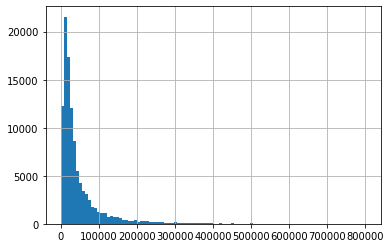

In [25]:
price_max=df['price_value'].max()
df['price_value'].hist(bins=100)

In [26]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [27]:
parameters=[]
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [28]:
filter_max=np.percentile(df.price_value, 99)
filter_max

339990.0

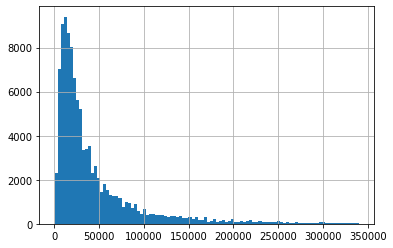

In [31]:
df_filtered=df[df.price_value <filter_max]
df_filtered.price_value.hist(bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd1a1414e0>,
      dtype=object)

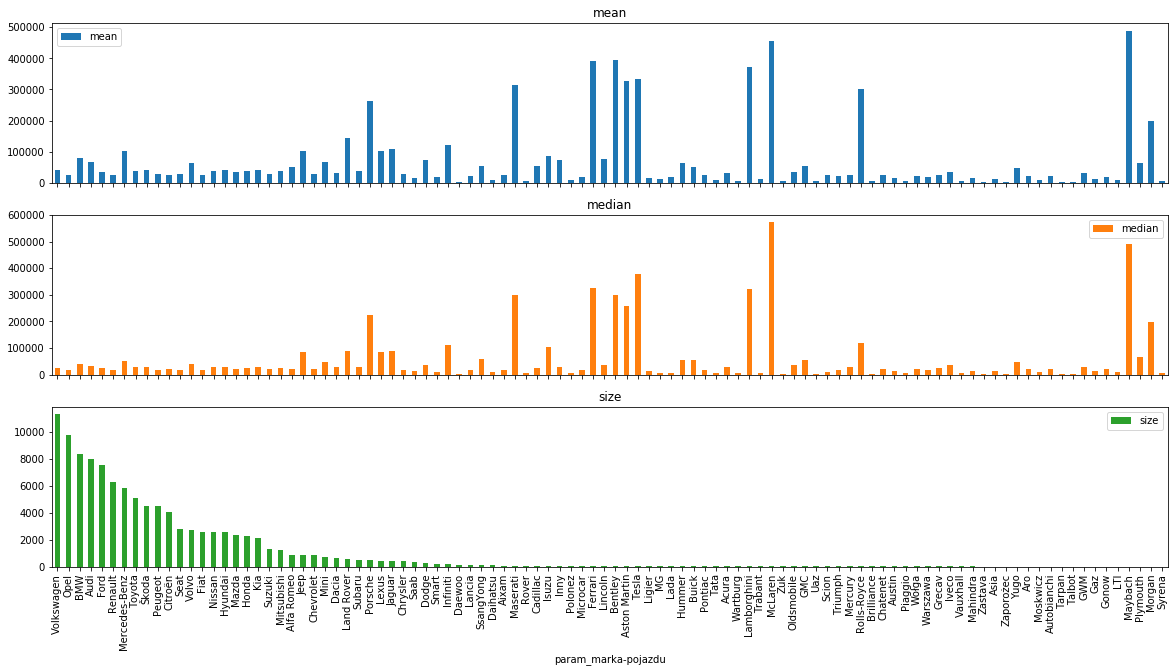

In [48]:
(
    df
 .groupby('param_marka-pojazdu')['price_value']
 .agg([np.mean,np.median, np.size])
 .sort_values(by='size', ascending=False)
 
 ).plot(kind='bar', figsize=(20,10), subplots=True)

In [0]:
def plot_car(feat_groupby, feat_agg, agg_funcs=[np.median,np.mean, np.size],feat_sort='mean', top=100, subplots=True):
  return (
      df
      .groupby(feat_groupby)[feat_agg]
      .agg(agg_funcs)
      .sort_values(by=feat_sort, ascending=False)
      .head(top)
  ).plot(kind='bar', figsize=(20,10), subplots=subplots);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd18380e80>,
      dtype=object)

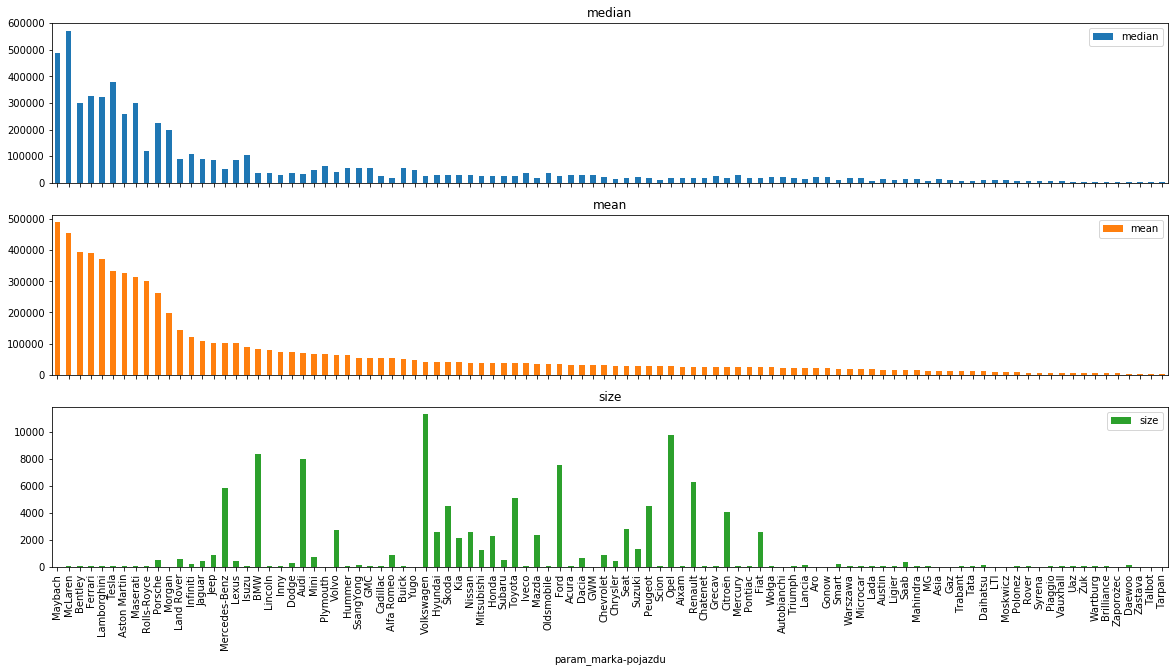

In [58]:
plot_car('param_marka-pojazdu','price_value')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd17f06e10>,
      dtype=object)

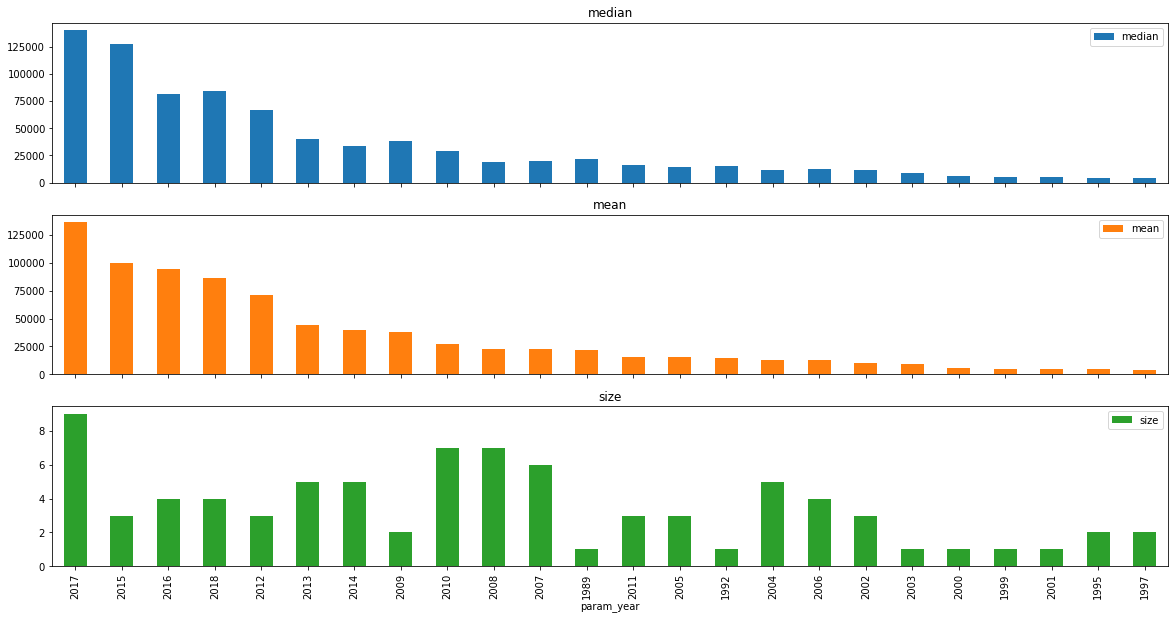

In [59]:
plot_car('param_year','price_value')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd178dae10>,
      dtype=object)

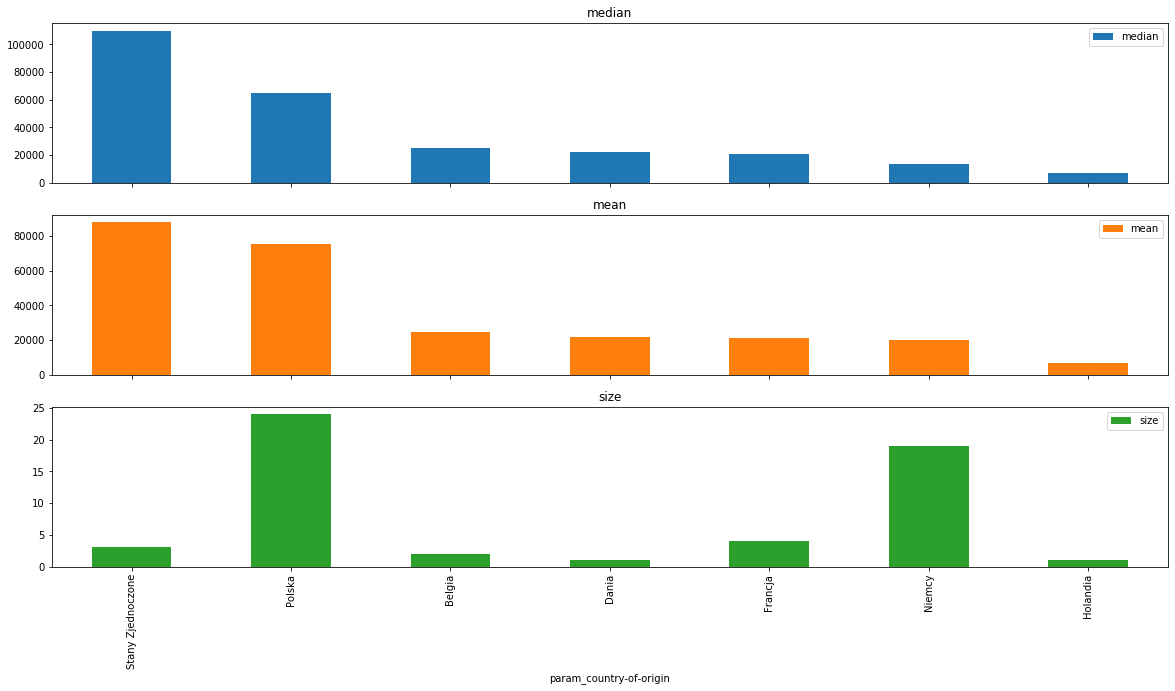

In [60]:
plot_car('param_country-of-origin','price_value')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd1788b208>,
      dtype=object)

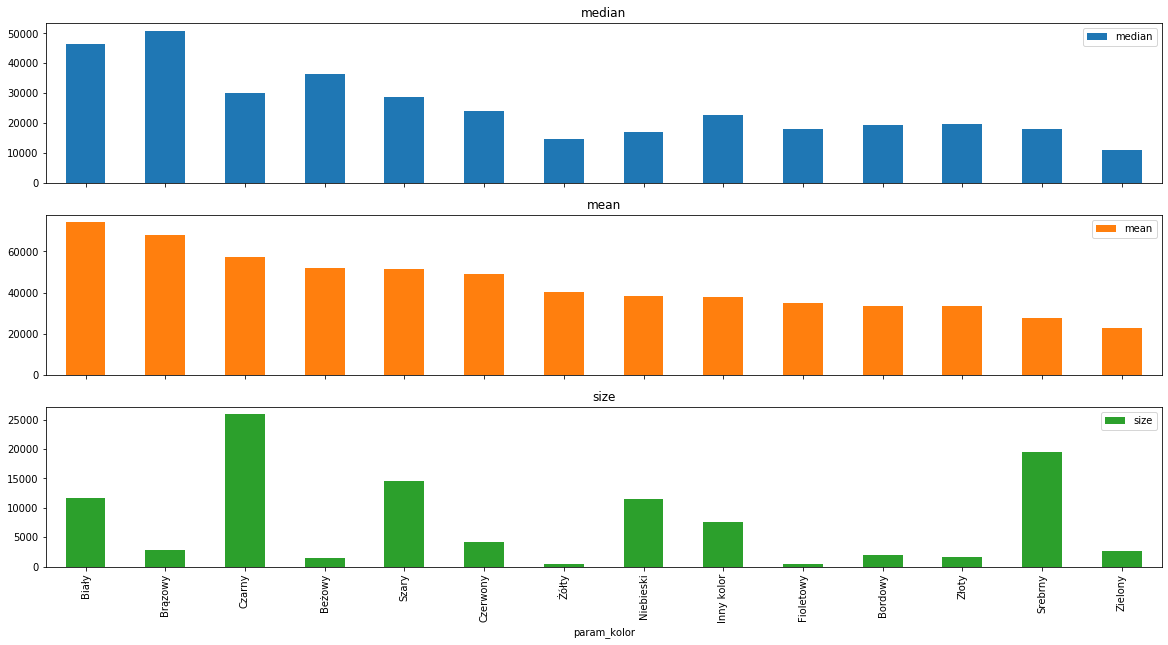

In [61]:
plot_car('param_kolor','price_value')